# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import requests

In [ ]:
url = "https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json"
req= requests.get(url)

In [ ]:
req

<Response [200]>

In [ ]:
soup= BeautifulSoup(req.content)

In [ ]:
soup

<html><body><p>{ "_id" : { "$oid" : "50b59cd75bed76f46522c34e" }, "student_id" : 0, "class_id" : 2, "scores" : [ { "type" : "exam", "score" : 57.92947112575566 }, { "type" : "quiz", "score" : 21.24542588206755 }, { "type" : "homework", "score" : 68.19567810587429 }, { "type" : "homework", "score" : 67.95019716560351 }, { "type" : "homework", "score" : 18.81037253352722 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c34f" }, "student_id" : 0, "class_id" : 28, "scores" : [ { "type" : "exam", "score" : 39.17749400402234 }, { "type" : "quiz", "score" : 78.44172815491468 }, { "type" : "homework", "score" : 20.81782269075502 }, { "type" : "homework", "score" : 70.44520452408949 }, { "type" : "homework", "score" : 50.66616327819226 }, { "type" : "homework", "score" : 53.84983118363991 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c350" }, "student_id" : 0, "class_id" : 5, "scores" : [ { "type" : "exam", "score" : 88.22950674232497 }, { "type" : "quiz", "score" : 79.28962650427184 }, { "typ

In [ ]:
df = pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json",lines=True)

In [ ]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [ ]:
df.scores[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [ ]:
df['scores'].iloc[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [ ]:
3 columns -> exam_score, quiz_score, homework_score

Output-> id, student_id, class_id, exam_score, quiz_score, homework_score

In [ ]:
# List Comprehension
exam_score = [round(float(re.sub('^{.*:|}','',str(df['scores'][i][0]))),2) for i in range(len(df['scores']))]
quiz_score = [round(float(re.sub('^{.*:|}','',str(df['scores'][i][1]))),2) for i in range(len(df['scores']))]
homework_score = [round(sum(list(map(float,re.findall('\d+.\d+',str(df['scores'][i][2:])))))/len(list(map(float,re.findall('\d+.\d+',str(df['scores'][i][2:]))))),2) for i in range(len(df['scores']))]


In [ ]:
for i in range(len(df._id)):
  df._id[i]=re.sub("^{.* '|'}",'',str(df._id[i]))

<ipython-input-12-36c22549711c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df._id[i]=re.sub("^{.* '|'}",'',str(df._id[i]))


In [ ]:
new_df=pd.DataFrame({"id":df['_id'],"student_id":df['student_id'],"class_id":df['class_id'],
                     "exam_score":exam_score,
                     "quiz_score":quiz_score,"homework_score":homework_score})

In [ ]:
new_df

,id,student_id,class_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,2,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,28,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,0,5,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,0,16,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,24,4.44,28.63,85.35
...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,14,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,8,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,48,15,17.49,26.63,52.28


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    object 
 1   student_id      280 non-null    int64  
 2   class_id        280 non-null    int64  
 3   exam_score      280 non-null    float64
 4   quiz_score      280 non-null    float64
 5   homework_score  280 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
new_df.describe()

,student_id,class_id,exam_score,quiz_score,homework_score
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,23.717857,15.096429,50.831143,48.960893,48.654464
std,14.314029,8.958766,28.709625,29.398710,20.154817
min,0.000000,0.000000,0.500000,0.720000,4.790000
25%,11.000000,7.000000,24.117500,23.837500,34.517500
50%,24.000000,15.500000,49.685000,49.850000,48.370000
75%,37.000000,23.000000,75.517500,72.822500,61.672500
max,49.000000,30.000000,99.980000,99.910000,98.920000


In [ ]:
new_df.drop('class_id',inplace=True,axis=1)

In [ ]:
new_df

,id,student_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,0,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,0,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,4.44,28.63,85.35
...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,48,17.49,26.63,52.28


,id,student_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,0,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,0,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,4.44,28.63,85.35
...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,48,17.49,26.63,52.28


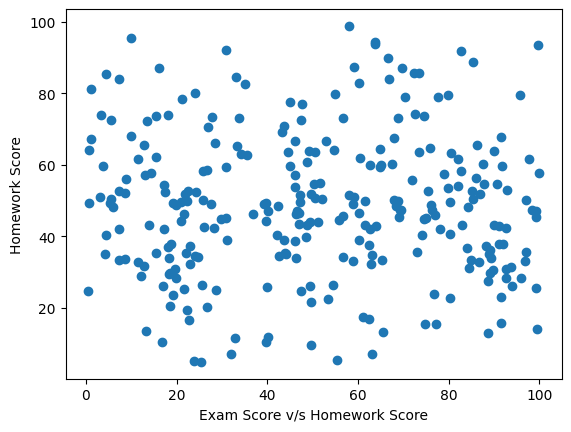

In [ ]:
x= new_df.exam_score
y= new_df.homework_score
plt.scatter(x,y)
plt.xlabel('Exam Score')
plt.ylabel('Homework Score')
plt.xlabel('Exam Score v/s Homework Score')
plt.show()